## <strong> 1. 데이터 로드하기 </strong>

In [29]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [46]:
mnist = fetch_openml('mnist_784')

In [47]:
# mnist.data는 판다스 dataframe 객체다.
mnist.data.iloc[0:1] 

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
# 각 sample의 label
mnist.target[0]

'5'

In [49]:
# target의 data-type
mnist.target.dtype 

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

In [50]:
# target, type 변경
mnist.target = mnist.target.astype(np.int8)

In [56]:
x = mnist.data.to_numpy() / 255 # 0~255값을 [0, 1] 구간으로 정규화한다.
y = mnist.target.to_numpy()

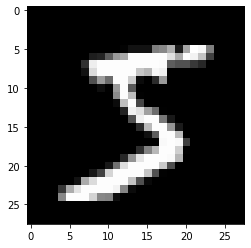

In [57]:
plt.imshow(x[0].reshape(28, 28), cmap='gray')

## <strong> 2. 훈련 데이터와 테스트 데이터 분리 </strong>

In [58]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/7, random_state=0) # test_size: 데이터에서 때어낼 테스트 세트의 비율을 지정한다.

x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(x_train, y_train)
ds_test = TensorDataset(x_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

## <strong> 3. 다층 퍼셉트론 </strong>

In [60]:
import torch.nn as nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [61]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [62]:
def train(epoch):
  model.train()

  for data, targets in loader_train:
    outputs = model(data)
    loss = loss_fn(outputs, targets)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  print("epoch{}：완료\n".format(epoch))

In [64]:
def test():
  model.eval()                                  # train time과 eval time에서 수행하는 다른 작업을 수행할 수 있도록 switching 하는 함수 / ex) dropout layer
  correct = 0

  with torch.no_grad():                         # 추론 과정에는 미분이 필요없다.
    for data, targets in loader_test:
      outputs = model(data)
      _, predicted = torch.max(outputs.data, 1) # max에 dim 인자를 주면 최대값을 argmax와 함께 리턴한다. 
      correct += (predicted == targets).sum()

  data_num = len(loader_test.dataset)           # 총 데이터 개수
  print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))

In [65]:
for epoch in range(3):
    train(epoch)

test()

epoch0：완료

epoch1：완료

epoch2：완료


테스트 데이터에서 예측 정확도: 9557/10000 (96%)



출처: https://wikidocs.net/61073